In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
tf.config.list_physical_devices('GPU')



2022-09-06 13:57:00.523504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 13:57:00.523535: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-06 13:57:02.075370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 13:57:02.075402: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 13:57:02.075420: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e6e3e5f38e93): /proc/driver/nvidia/version does not exist


[]

In [2]:
mnist = tf.keras.datasets.mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

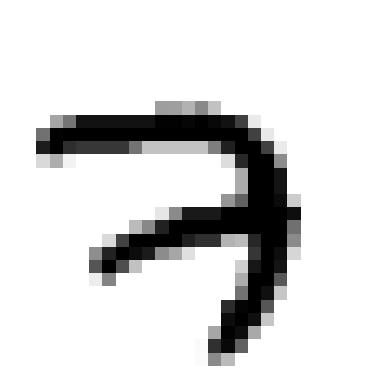

7

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

<AxesSubplot:>

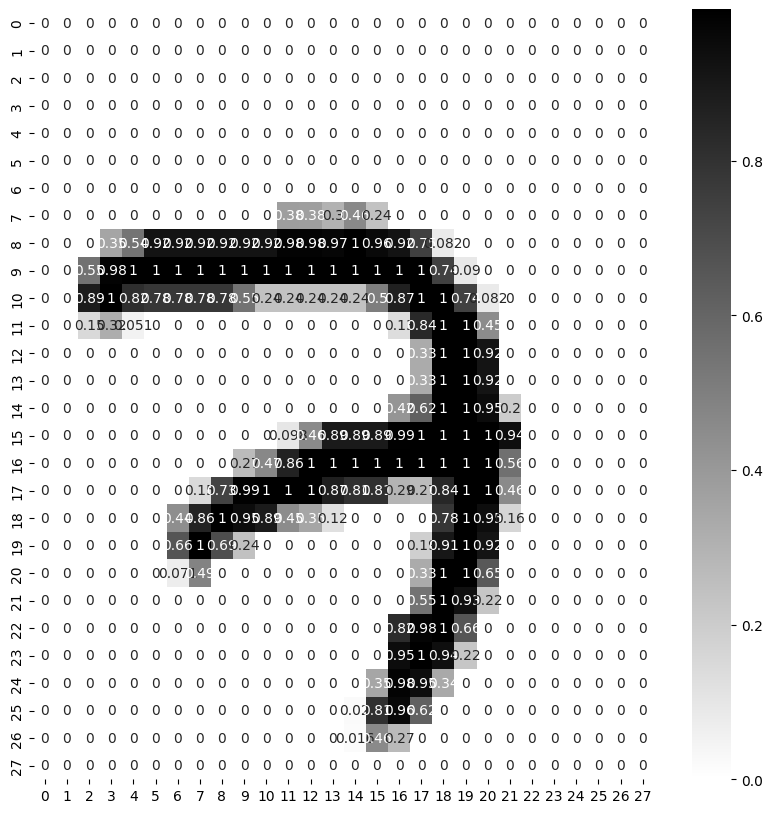

In [6]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [7]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [8]:
model = tf.keras.models.Sequential(LAYERS)

2022-09-06 13:57:04.903284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.layers

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [12]:
hidden1.get_weights() #weights + bias

[array([[ 0.05582547, -0.01332801,  0.04227633, ..., -0.00811684,
         -0.0236163 ,  0.01698078],
        [ 0.05476117,  0.02990968, -0.07159627, ...,  0.05281256,
          0.03618971, -0.05024091],
        [-0.04953223,  0.05845174,  0.05763692, ...,  0.07155378,
          0.05114643, -0.00685848],
        ...,
        [ 0.01151742,  0.01663303, -0.06617323, ..., -0.0717082 ,
         -0.03703361, -0.05709872],
        [ 0.02607042, -0.03019648,  0.02961148, ..., -0.03617233,
          0.05778842,  0.01813373],
        [-0.01520791, -0.06638592,  0.04979292, ..., -0.06848839,
         -0.02639368, -0.04900002]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [13]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [14]:
biases.shape

(300,)

loss_function(actual, pred) = error

In [15]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


Important -
Epochs: Integer.

Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

batch_size: Integer or None.

Number of samples per gradient update. If unspecified, batch_size will default to 32.

NOTE: Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

validation_batch_size: Integer or None.

Number of samples per validation batch.

If unspecified, will default to batch_size.

NOTE: Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

Reference

In [16]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6036 - accuracy: 0.8423 - val_loss: 0.3063 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2857 - accuracy: 0.9182 - val_loss: 0.2368 - val_accuracy: 0.9344
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2318 - accuracy: 0.9334 - val_loss: 0.1990 - val_accuracy: 0.9458
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1975 - accuracy: 0.9429 - val_loss: 0.1744 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1728 - accuracy: 0.9500 - val_loss: 0.1594 - val_accuracy: 0.9550
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1528 - accuracy: 0.9559 - val_loss: 0.1534 - val_accuracy: 0.9580
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1371 - accuracy: 0.9607 - val_loss: 0.1301 - val_accuracy:

In [17]:
print(f'no. of batches: {55000/32} \n each batch size(default): 32')

no. of batches: 1718.75 
 each batch size(default): 32


In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 844us/step - loss: 0.0713 - accuracy: 0.9776


[0.07125697284936905, 0.9775999784469604]

In [19]:
model.save("model.h5")

In [20]:
loaded_model = tf.keras.models.load_model("model.h5")

In [21]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 827us/step - loss: 0.0713 - accuracy: 0.9776


[0.07125697284936905, 0.9775999784469604]

In [22]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.603575,0.842345,0.306259,0.9158
1,0.285664,0.918218,0.236796,0.9344
2,0.231818,0.933436,0.199039,0.9458
3,0.197546,0.942855,0.174354,0.9512
4,0.172765,0.950000,0.159406,0.9550
5,0.152840,0.955891,0.153407,0.9580
6,0.137143,0.960709,0.130100,0.9672
7,0.124034,0.964255,0.124227,0.9638
8,0.113329,0.967436,0.118012,0.9676
9,0.103850,0.970400,0.107444,0.9696


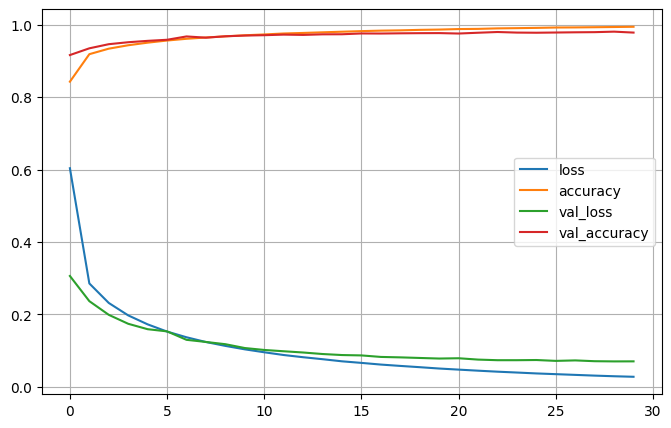

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [24]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 68ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

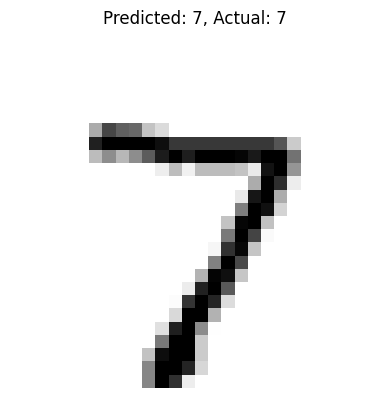

------------------------------------------------------------


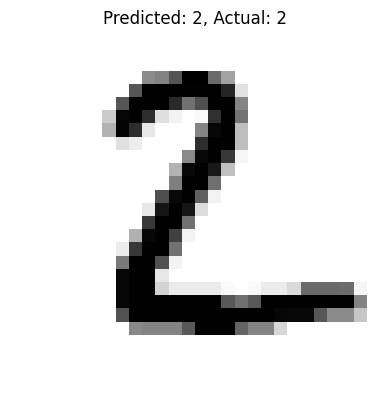

------------------------------------------------------------


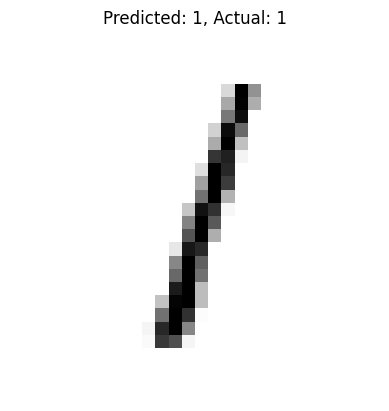

------------------------------------------------------------


In [26]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)